# 1 KMeans
usaremos la version ligera de KNN que suministra la data por lotes para un computo mas ligero.
complementalo con el notebook:
3-marketing-AI.ipynb

In [195]:
import pandas as pd
import numpy as np 
from seaborn import palettes
import seaborn as sns

# MiniBatchMeans es casi igual al algoritmo de K_Means pero consume menos recursos.
from sklearn.cluster import (MiniBatchKMeans, KMeans)

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## data 

In [196]:
dataset = pd.read_csv('./datasets/candy.csv')

# eliminaremos los nombres de los caramelos ya que es categorica
X = dataset.drop('competitorname', axis=1)
X.head(3)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086


## modelo 

In [197]:
kmeans = MiniBatchKMeans(n_clusters=3, #definiremos 4 grupos 
                        random_state=42, 
                        batch_size=8).fit(X) # la cantidad de datos por lote para aligerar el computo 

print('Total de centros: ', len(kmeans.cluster_centers_))
print('*'*64)

# guardamos la etiqueta de cada grupo en el DS
print(kmeans.predict(X))
print('*'*64)
X['cluster KNN'] = kmeans.predict(X)

print(X.head(3))

Total de centros:  3
****************************************************************
[1 1 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 1 2 2 0 2 1 0 0 2 1 1 2 2 1
 2 1 2 2 2 1 1 0 0 2 1 0 0 0 1 1 1 1 0 1 0 0 0 1 2 0 2 1 2 2 2 1 0 0 0 0 2
 2 0 2 2 2 1 2 0 0 0 2]
****************************************************************
   chocolate  fruity  caramel  peanutyalmondy  nougat  crispedricewafer  hard  \
0          1       0        1               0       0                 1     0   
1          1       0        0               0       1                 0     0   
2          0       0        0               0       0                 0     0   

   bar  pluribus  sugarpercent  pricepercent  winpercent  cluster KNN  
0    1         0         0.732         0.860   66.971725            1  
1    1         0         0.604         0.511   67.602936            1  
2    0         0         0.011         0.116   32.261086            0  


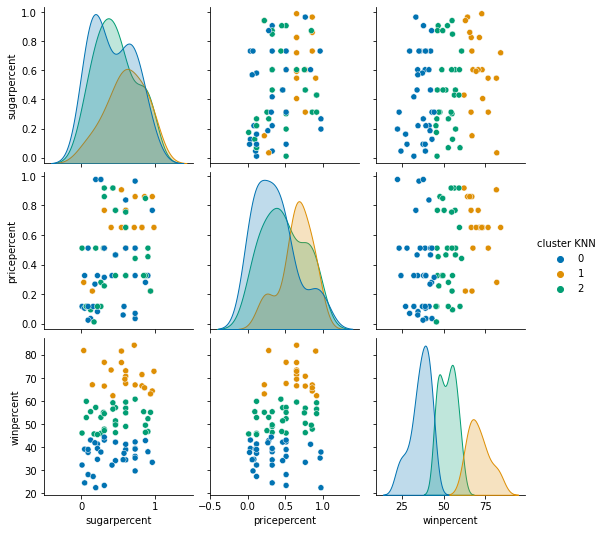

In [198]:
sns.pairplot(X[['sugarpercent','pricepercent','winpercent', 'cluster KNN']],
                hue = 'cluster KNN',
                palette='colorblind')

plt.show()

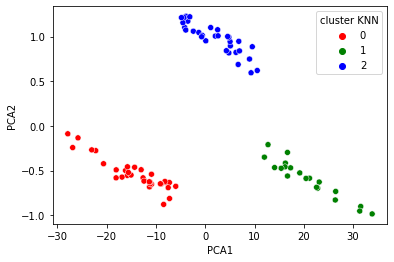

In [199]:
from sklearn.decomposition import PCA

model_PCA = PCA(n_components=2) # instanciamos el modelo 
data_PCA = model_PCA.fit_transform(X) # realizamos tranformacion
df_PCA = pd.DataFrame(data= data_PCA, columns= ["PCA1","PCA2"])
df_PCA = pd.concat([df_PCA, X['cluster KNN']], axis=1)

sns.scatterplot(x = "PCA1", y = "PCA2", 
hue = "cluster KNN", data = df_PCA, palette = ["red", "green", "blue"])
plt.show()

# 2 MeanShift

In [200]:
from sklearn.cluster import MeanShift

In [201]:
X_MS = X.drop('cluster KNN', axis=1) # quitamos la columna de las predicciones de KNN
X_MS.head(3)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086


## modelo 
Aquí el algoritmo nos devolvio 3 clusters, porque le pareció que esa era la cantidad correcta teniendo en cuenta como se distrubuye la densidad de nuestros datos.

Imprimamos la ubicación de los centros que puso sobre nuestros datos. Hay que recordar que estos algoritmos crean un centro y a partir de ahí se ajuztan a todos los datos que lo rodean  

In [202]:

meanshift = MeanShift(bandwidth=None).fit(X_MS) 

print("numero de clusters detectados: ",  max(meanshift.labels_) + 1 )
print('='*64)

print("centros de cada caracteristica: ")
print(meanshift.cluster_centers_)

numero de clusters detectados:  3
centros de cada caracteristica: 
[[2.25000000e-01 5.75000000e-01 1.00000000e-01 2.50000000e-02
  5.00000000e-02 2.50000000e-02 3.00000000e-01 1.00000000e-01
  5.50000000e-01 4.57599993e-01 3.67824996e-01 4.10442122e+01]
 [4.68750000e-01 5.00000000e-01 1.25000000e-01 1.56250000e-01
  9.37500000e-02 6.25000000e-02 1.25000000e-01 3.12500000e-01
  5.31250000e-01 4.57281243e-01 4.67874998e-01 5.21138597e+01]
 [8.26086957e-01 1.73913043e-01 3.04347826e-01 3.04347826e-01
  1.73913043e-01 1.73913043e-01 0.00000000e+00 5.21739130e-01
  4.34782609e-01 5.81391293e-01 6.38086963e-01 6.47120799e+01]]


In [203]:
X['meanshift'] = meanshift.labels_
X.head(9)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,cluster KNN,meanshift
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1,2
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1,2
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0,0
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,2,0
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,2,1
5,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546,2,1
6,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547,2,1
7,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824,0,0
8,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963,0,0


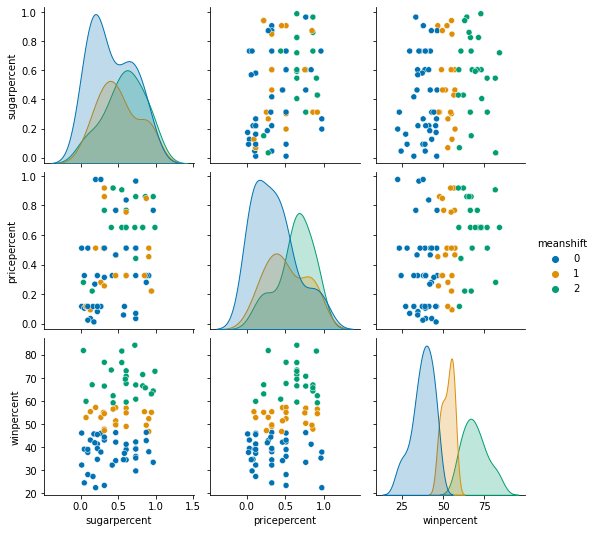

In [204]:

sns.pairplot(X[['sugarpercent','pricepercent','winpercent', 'meanshift']],
            hue = 'meanshift',
            palette='colorblind')

plt.show()

## comparamos los cluster de meanshift vs KNN
1. estandarizaremos las etiquetas para que tengan el mismo nombre
2. usamos accuracy_score para medir el grado de diferencia entre resultados de cada clasificacion

In [205]:
# cambiaremos el nombre de etiqueta de meanshift a el formato de KNN 
df_p = pd.DataFrame.copy(X)

df_p.loc[df_p['meanshift'] == 1, 'meanshift'] = "a" # escondemos esta variable para que del que asignamos abajo 
df_p.loc[df_p['meanshift'] == 2, 'meanshift'] = 1 
df_p.loc[df_p['meanshift'] == "a", 'meanshift'] = 2

X["meanshift_to_KNN"] = df_p["meanshift"].values

In [206]:
from  sklearn import metrics
c = [1,2,3]
metrics.accuracy_score(X["meanshift_to_KNN"].values.tolist(), X["cluster KNN"].values.tolist())

0.8823529411764706

In [207]:
# creamos una columna para identificar los registros en los que KNN y meanshift tuvieron diferencias
X["diff_cluster"] = X.apply(lambda row: False if row["meanshift_to_KNN"] == row["cluster KNN"] else True, axis=1)

In [208]:
# vemos que son 10 
X['diff_cluster'].value_counts()

False    75
True     10
Name: diff_cluster, dtype: int64

In [209]:
# los registros que no pudieron clasificar
X[X['diff_cluster'] == True]

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,cluster KNN,meanshift,meanshift_to_KNN,diff_cluster
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,2,0,0,True
25,1,0,0,0,0,0,0,1,0,0.430,0.918,59.236122,2,2,1,True
34,0,1,0,0,0,0,0,0,1,0.872,0.325,46.411716,2,0,0,True
37,1,0,1,0,1,0,0,1,0,0.732,0.441,60.800701,2,2,1,True
46,0,0,0,1,1,0,0,1,0,0.465,0.767,46.296597,2,0,0,True
63,0,1,0,0,0,0,1,0,1,0.267,0.116,45.995827,2,0,0,True
65,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251,2,2,1,True
66,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998,2,2,1,True
76,1,0,0,0,0,0,0,0,1,0.174,0.011,45.736748,2,0,0,True
80,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282,2,0,0,True
